<h3><b>Olympics Data Analysis (1994–2024)</b></h3>
<b>Project Story</b><br>

From the glory of Athens to the excitement of Paris 2024 — the Olympic Games have always symbolized unity, excellence, and the relentless human spirit.
Through this project, I wanted to uncover which nations have dominated the medal tables, how performance evolved over time, and what trends define the modern Olympics era.
This journey through data isn’t just about numbers — it’s about resilience, competition, and national pride.

<b>Project Overview:</b><br>
This project analyzes Olympic medal trends between 1994 and 2024, focusing on country performance, medal distribution patterns, and changes over time.
Using Python libraries like Pandas, NumPy, Matplotlib, and Seaborn, we performed exploratory data analysis (EDA) to identify:  

<ul>Top-performing countries</ul>
<ul>Yearly performance fluctuations</ul>
<ul>Shifts in medal dominance across continents</ul>
<ul>Overall correlation between medal counts</ul>

<h3><b>Import Libraries & Dataset</b></h3>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df= pd.read_csv('Olympic_Games (1994-2024).csv')
df.head(5)

,NOC,Gold,Silver,Bronze,Total,Year
0,GER,11,12,6,29,2006
1,USA,9,9,7,25,2006
2,AUT,9,7,7,23,2006
3,RUS,8,6,8,22,2006
4,CAN,7,10,7,24,2006


<h3><b>Data Overview & Cleaning

In [13]:
df.info()
df.isnull().sum()
#coverting numeric column into integer
df[['Gold','Silver','Bronze','Total','Year']] = df[['Gold','Silver','Bronze','Total','Year']].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     879 non-null    object
 1   Gold    879 non-null    int64 
 2   Silver  879 non-null    int64 
 3   Bronze  879 non-null    int64 
 4   Total   879 non-null    int64 
 5   Year    879 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 41.3+ KB


<h3><b>Basic Descriptive Statistics

In [14]:
df.describe()

,Gold,Silver,Bronze,Total,Year
count,879.000000,879.000000,879.000000,879.000000,879.000000
mean,3.571104,3.574516,3.961320,11.106940,2010.150171
std,6.405374,5.553926,5.633317,16.831198,9.191222
min,0.000000,0.000000,0.000000,1.000000,1994.000000
25%,0.000000,1.000000,1.000000,2.000000,2002.000000
50%,1.000000,2.000000,2.000000,5.000000,2010.000000
75%,4.000000,4.000000,5.000000,13.000000,2018.000000
max,48.000000,44.000000,42.000000,126.000000,2024.000000


<h3><b>Top Performing Countries (Overall)

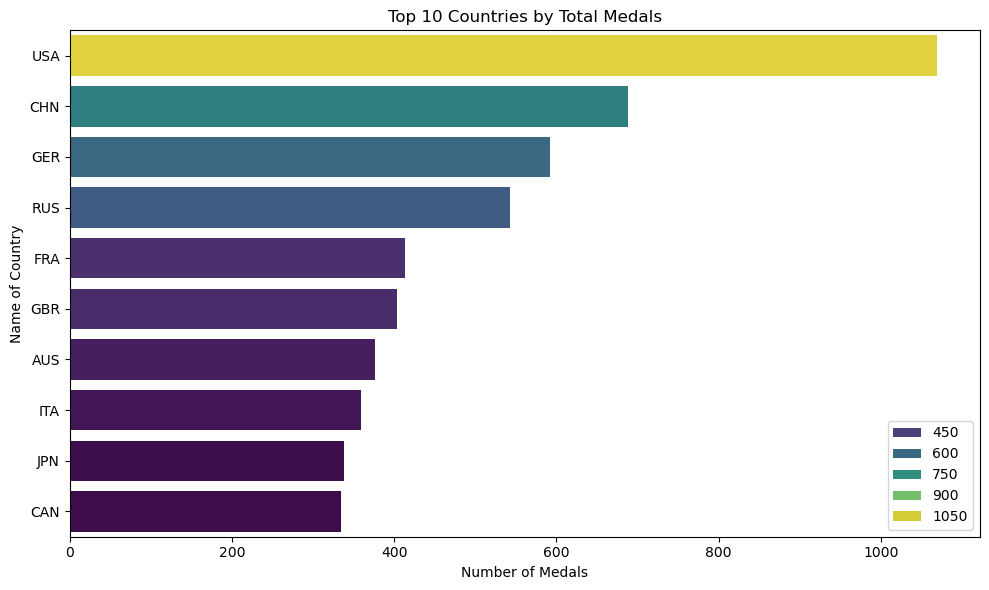

In [18]:
top_countries = df.groupby('NOC')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Name of Country')
plt.tight_layout()
plt.show()

<h3><b>Yearly Medal Trends</h3>

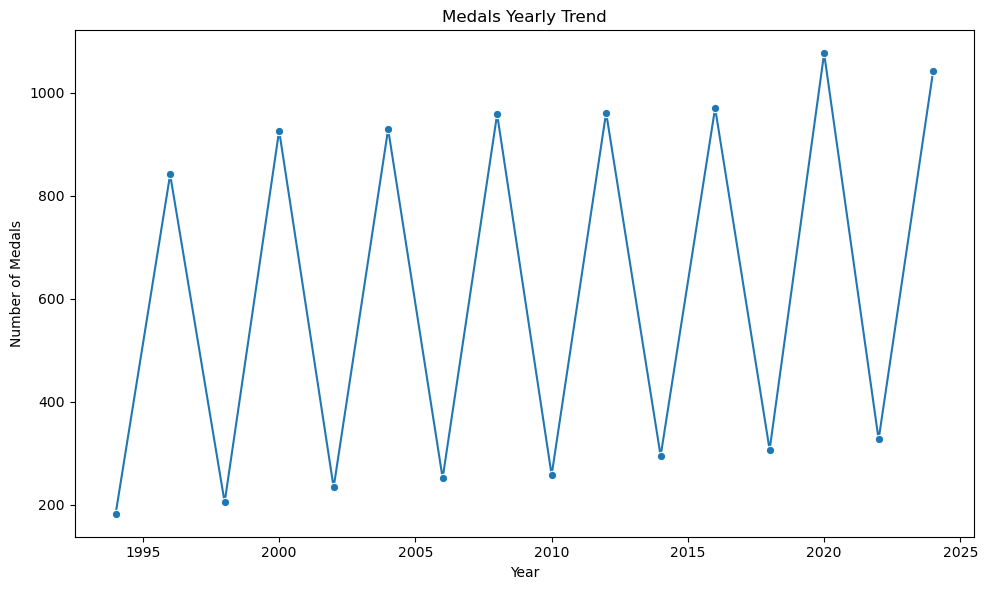

In [20]:
yearly_medals = df.groupby('Year')['Total'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_medals.index, y=yearly_medals.values, marker='o')
plt.title('Medals Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.show()

<h3><b>Country-Wise Medal Progression</b></h3>

Analyze how leading nations performed over time.

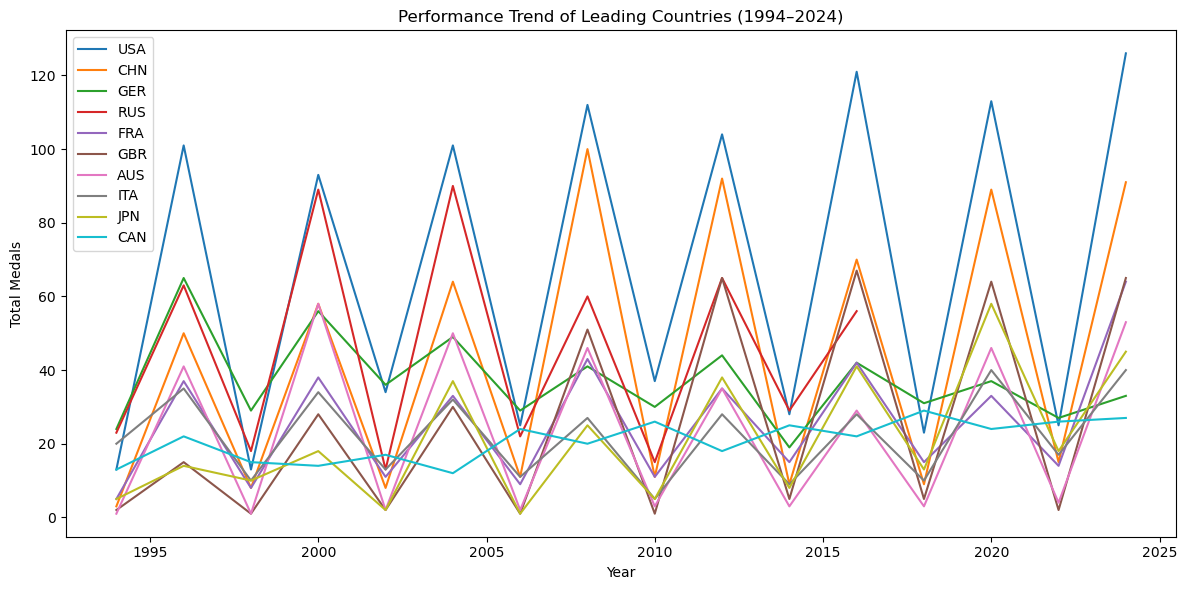

In [21]:
top_nations = ['USA','CHN','GER','RUS','FRA','GBR','AUS','ITA','JPN','CAN']
plt.figure(figsize=(12,6))
for c in top_nations:
    nation_data = df[df['NOC']==c]
    sns.lineplot(x='Year', y='Total', data=nation_data, label=c)
plt.title('Performance Trend of Leading Countries (1994–2024)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.tight_layout()
plt.show()

<h3><b>Gold Vs Total Correlation

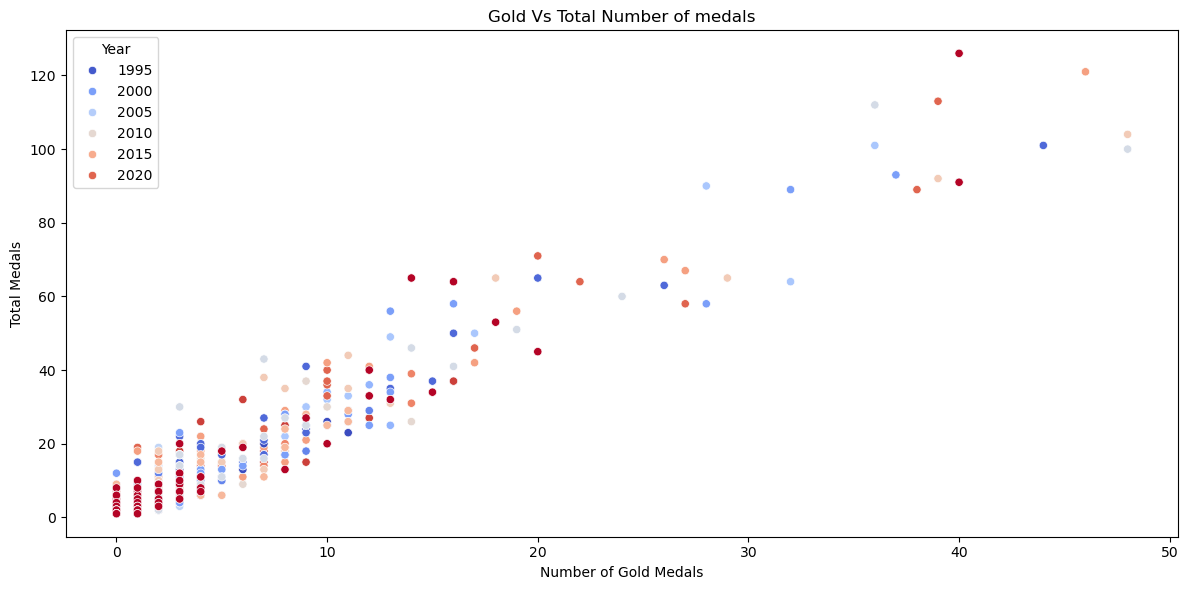

,Gold,Silver,Bronze,Total
Gold,1.000000,0.889187,0.854239,0.959887
Silver,0.889187,1.000000,0.875228,0.961306
Bronze,0.854239,0.875228,1.000000,0.948595
Total,0.959887,0.961306,0.948595,1.000000


In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Gold', y='Total', data=df, hue='Year', palette='coolwarm')
plt.title('Gold Vs Total Number of medals')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Total Medals')
plt.tight_layout()
plt.show()
df[['Gold','Silver','Bronze','Total']].corr()

<h3><b>Yearly Ranking Heatmap

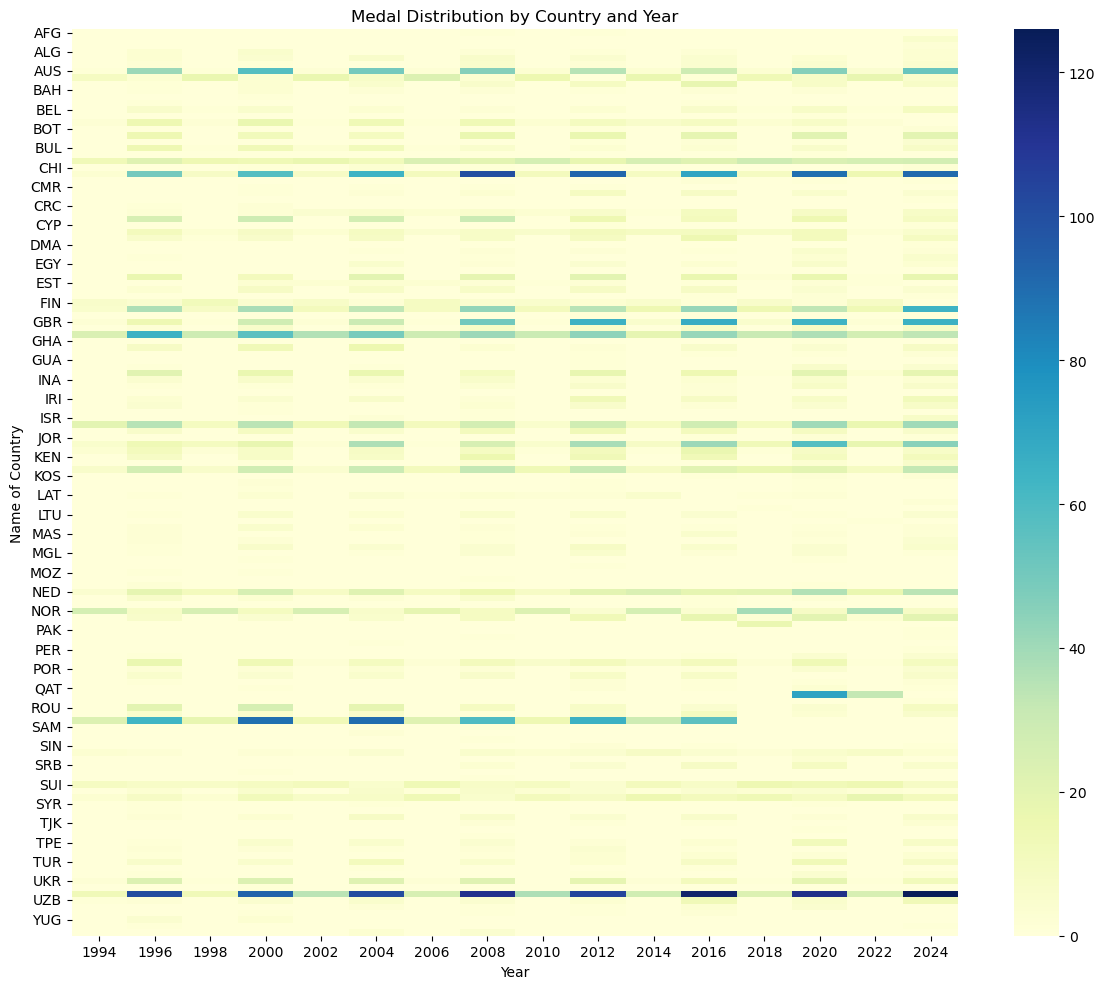

In [27]:
pivot = df.pivot_table(values='Total', index='NOC', columns='Year', aggfunc='sum').fillna(0)
plt.figure(figsize=(12,10))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Medal Distribution by Country and Year')
plt.xlabel('Year')
plt.ylabel('Name of Country')
plt.tight_layout()
plt.show()

<h3><b>Performance Shifts</b></h3>
Identify emerging or declining countries.

In [28]:
growth = df.groupby('NOC')['Total'].apply(lambda x: (x.iloc[-1]-x.iloc[0]) if len(x)>1 else 0)
growth.sort_values(ascending=False).head(10)

NOC
USA    101
CHN     80
GBR     64
FRA     55
AUS     51
JPN     44
RUS     38
ITA     29
NED     25
KOR     21
Name: Total, dtype: int64

<h3><b>Conclusion & Key Insights

### Key Insights

    The USA remains the global leader in total medals, followed by China and Russia.

    China’s dominance surged post-2008, coinciding with hosting the Beijing Olympics.

    Japan, Australia, and Great Britain show consistent improvement.

    Nordic countries dominate Winter Olympics years, especially Norway and Germany.

    The total number of medals awarded has gradually increased due to new sports being introduced.

### Final Takeaway:
Olympic success isn’t just tradition — it’s strategic investment in athletes, facilities, and training.
Countries with long-term sports infrastructure and government support continue to dominate across decades.